### 파일 설명

- sales_train.csv: 학습 데이터 세트. 2013년 1월부터 2015년 10월까지의 일일 역사 데이터.
- test.csv: 테스트 데이터 세트. 2015년 11월 동안 이 상점과 제품의 판매량을 예측해야 합니다.
- sample_submission.csv: 올바른 형식의 샘플 제출 파일.
- items.csv: 제품에 대한 추가 정보.
- item_categories.csv: 제품 카테고리에 대한 추가 정보.
-shops.csv: 상점에 대한 추가 정보.

### 데이터 필드

-  ID: 테스트 세트 내의 (Shop, Item) 튜플을 나타내는 ID
-  shop_id: 상점의 고유 식별자
-  item_id: 제품의 고유 식별자
-  item_category_id: 제품 카테고리의 고유 식별자
-  item_cnt_day: 판매된 제품 수. 이 측정값의 월간 합계를 예측합니다.
-  item_price: 제품의 현재 가격
-  date: 날짜 형식은 일/월/연도(dd/mm/yyyy)
-  date_block_num: 편의를 위해 사용되는 연속 월 번호. 2013년 1월은 0, 2013년 2월은 1, ..., 2015년 10월은 33
-  item_name: 제품명
-  shop_name: 상점명
-  item_category_name: 제품 카테고리명

# 판다스

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# DATA PATH
data_path = 'dataset/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [3]:
## shape

print('items shape: ', items.shape)
print('item_categories shape: ', item_categories.shape)
print('sales_train shape: ', sales_train.shape)
print('sample_submission shape: ', submission.shape)
print('shops shape: ', shops.shape)
print('test shape: ', test.shape)

items shape:  (22170, 3)
item_categories shape:  (84, 2)
sales_train shape:  (2935849, 6)
sample_submission shape:  (214200, 2)
shops shape:  (60, 2)
test shape:  (214200, 3)


In [4]:
## type

print('items data types: ', items.dtypes)
print('**********')
print('item_categories data types: ', item_categories.dtypes)
print('**********')
print('sales_train data types: ', sales_train.dtypes)

items data types:  item_name           object
item_id              int64
item_category_id     int64
dtype: object
**********
item_categories data types:  item_category_name    object
item_category_id       int64
dtype: object
**********
sales_train data types:  date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


In [5]:
## type

print('sample_submission data types: ', submission.dtypes)
print('**********')
print('shops data types: ', shops.dtypes)
print('**********')
print('test data types: ', test.dtypes)

sample_submission data types:  ID                  int64
item_cnt_month    float64
dtype: object
**********
shops data types:  shop_name    object
shop_id       int64
dtype: object
**********
test data types:  ID         int64
shop_id    int64
item_id    int64
dtype: object


In [6]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
sales_train.info(show_counts=True) # True include counts NULL 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
shops.head() # 뭔말이고 ;;;;

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
item_categories.head() # 카테고리 

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
items.sample(5) # 아이템들 

,item_name,item_id,item_category_id
8406,АТЛАНТИС (BD),8406,37
5401,"One Piece Unlimited World Red [PS3, английская...",5401,19
21503,Хрестоматия по литературе для среднего школьно...,21503,43
19977,Толстовка Minecraft Ocelot Premium Zip-up детс...,19977,61
1467,Assassin's Creed 2 Game of the Year Edition (E...,1467,19


In [11]:
sales_train.sample(10) # 이 데이터는 아이디 키로 데이터들이 연동됨

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1782171,25.06.2014,17,47,7137,418.4,1.0
473732,08.05.2013,4,42,3695,1599.0,1.0
2517908,04.03.2015,26,54,7812,5490.0,1.0
2184856,28.11.2014,22,43,13151,139.0,1.0
614802,01.06.2013,5,57,22152,149.0,1.0
1946595,31.08.2014,19,24,21880,149.0,1.0
2191982,11.11.2014,22,42,7856,799.0,1.0
513382,26.05.2013,4,14,4512,899.0,1.0
939093,29.10.2013,9,38,20104,249.0,1.0
681955,23.07.2013,6,24,3196,899.0,1.0


In [12]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [13]:
## 결측치 ( 없다 )


# check the missing values
print('items missing values: ', items.isnull().sum())
print('**********')
print('item_categories missing values: ', item_categories.isnull().sum())
print('**********')
print('sales_train missing values: ', sales_train.isnull().sum())
print('**********')
print('sample_submission missing values: ', submission.isnull().sum())

items missing values:  item_name           0
item_id             0
item_category_id    0
dtype: int64
**********
item_categories missing values:  item_category_name    0
item_category_id      0
dtype: int64
**********
sales_train missing values:  date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
**********
sample_submission missing values:  ID                0
item_cnt_month    0
dtype: int64


In [14]:
print('shops missing values: ', shops.isnull().sum())
print('**********')
print('test missing values: ', test.isnull().sum())

shops missing values:  shop_name    0
shop_id      0
dtype: int64
**********
test missing values:  ID         0
shop_id    0
item_id    0
dtype: int64


# 비주얼

In [15]:
sales_train['year'] = pd.DatetimeIndex(sales_train['date']).year
sales_train['month'] = pd.DatetimeIndex(sales_train['date']).month
sales_train['year'].unique() # 고윳값

array([2013, 2014, 2015], dtype=int32)

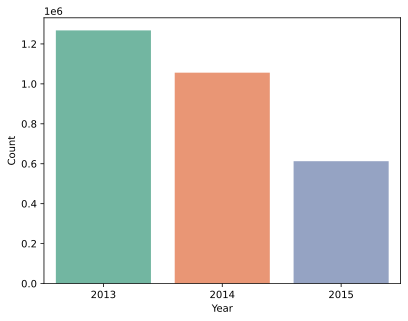

In [16]:
sns.countplot(data=sales_train, x='year', palette='Set2')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

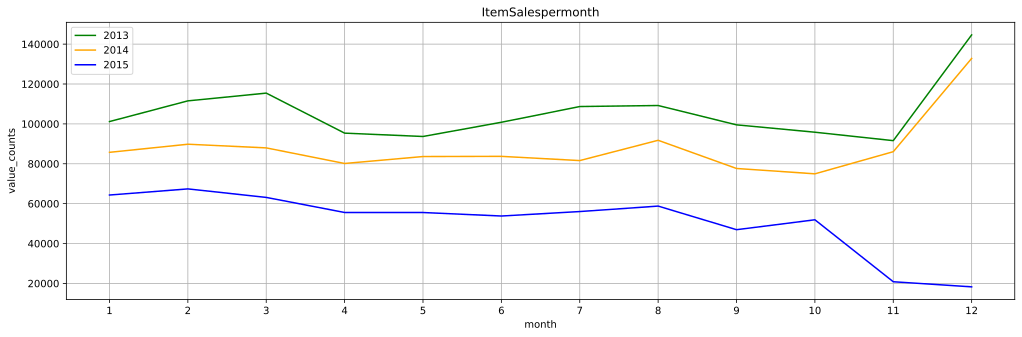

In [17]:
fig, ax = plt.subplots(figsize=(17,5))
plt.xticks([i for i in range(1,13)])
sales_train.groupby(sales_train[sales_train['year']==2013].month).count()['item_id'].plot(ax=ax, label=2013, color='green')
sales_train.groupby(sales_train[sales_train['year']==2014].month).count()['item_id'].plot(label=2014, color='orange')
sales_train.groupby(sales_train[sales_train['year']==2015].month).count()['item_id'].plot(label=2015, color='blue')
plt.grid("on")
plt.ylabel('value_counts')
plt.title("ItemSalespermonth")
plt.legend()

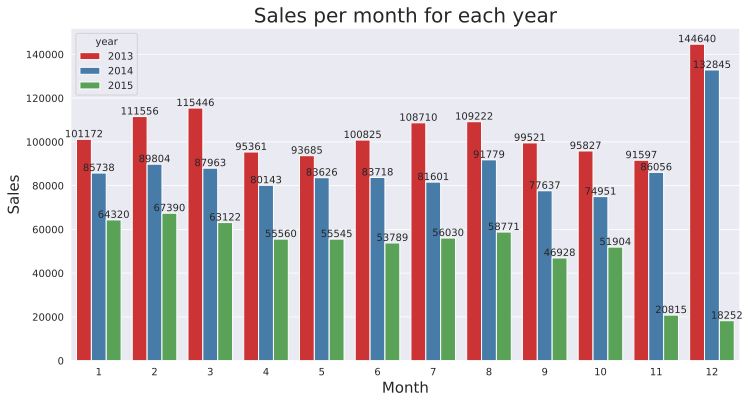

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6), dpi=300)
sns.countplot(x='month', hue='year', data=sales_train , palette='Set1')
plt.title('Sales per month for each year', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.bar_label(plt.gca().containers[0], fmt='%.0f')  
plt.bar_label(plt.gca().containers[1], fmt='%.0f')
plt.bar_label(plt.gca().containers[2], fmt='%.0f')

plt.show()

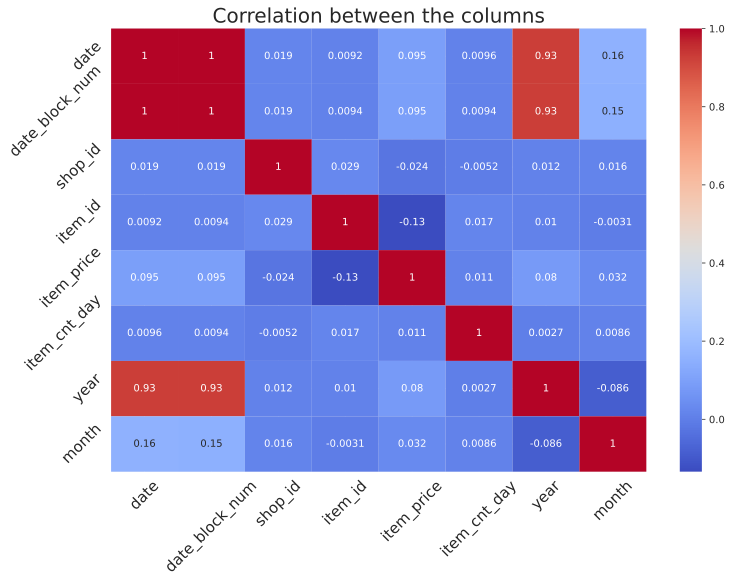

In [19]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')

sales_train['year'] = sales_train['date'].dt.year

plt.figure(figsize=(12,8), dpi=300)    
sns.heatmap(sales_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the columns', fontsize=20)
plt.xticks(fontsize=15, rotation=45)  # 45도 기울이기
plt.yticks(fontsize=15, rotation=45)

plt.show()

## sales_train 의 상관관계

In [20]:
sales_train.groupby(sales_train['shop_id']).agg({'item_id': 'count'}).mean()

item_id    48930.816667
dtype: float64

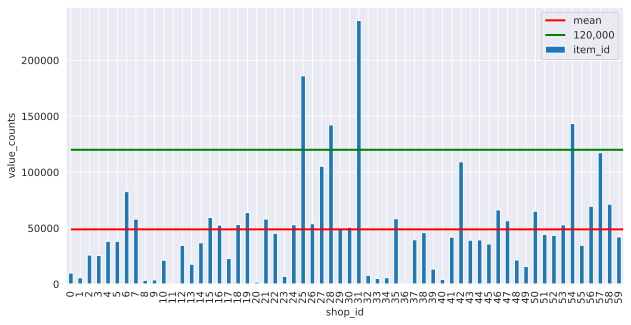

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sales_train.groupby(sales_train['shop_id']).agg({'item_id': 'count'}).plot.bar(ax=ax)
y_avg = sales_train.groupby(sales_train['shop_id']).agg({'item_id': 'count'}).mean()
ax.hlines(y_avg, xmin=0, xmax=60, linewidth=2, color='r',label='mean')
ax.hlines(120000, xmin=0, xmax=60, linewidth=2, color='g',label='120,000')
plt.ylabel('value_counts')
plt.legend()

## 매장 id 별 아이템 id 카운트

Text(0, 0.5, 'value_counts')

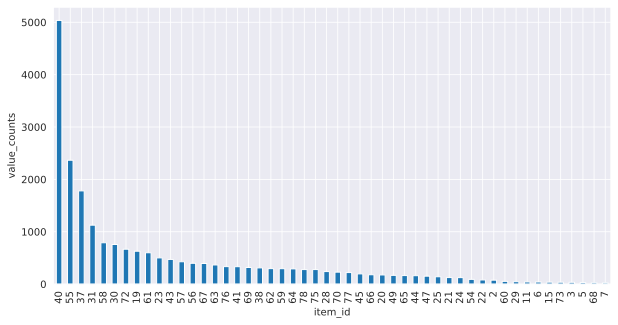

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
items.item_category_id.value_counts().iloc[:50].plot.bar(ax=ax)
plt.xlabel('item_id')
plt.ylabel('value_counts')

## 아이템 카테고리별 아이템 빈도수

In [23]:
top_10_shops = sales_train.groupby('shop_id')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
top_10_shops

shop_id
31    310777.0
25    241920.0
54    185790.0
28    184557.0
42    144934.0
57    141107.0
27    136657.0
6     100489.0
58     81734.0
46     78990.0
Name: item_cnt_day, dtype: float64

In [24]:
top_10_items = sales_train.groupby('item_id')['item_price'].sum().sort_values(ascending=False).head(10)
top_10_items

item_id
6675     1.132643e+08
13443    2.135946e+07
3732     1.756505e+07
3734     1.589006e+07
5823     1.307078e+07
13405    1.253271e+07
5672     1.206254e+07
16787    1.203159e+07
5822     9.984311e+06
17717    9.924972e+06
Name: item_price, dtype: float64